In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # data visualization

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [2]:
rent = pd.read_csv('rent_after_handling.csv')

In [4]:
rent

,Price,Prop_type,Size,Bath,Bed,Term,City,Division
0,50,3,15,0,0,/ Monthly,Valongo,Valongo
1,700,1,80,0,2,/ Monthly,Marco de Canaveses,Várzea
2,1600,2,145,3,3,/ Monthly,Porto,Cedofeita
3,1100,2,110,2,2,/ Monthly,Maia,Cidade da Maia
4,900,2,100,2,3,/ Monthly,Porto,Campanhã
...,...,...,...,...,...,...,...,...
735,350,3,124,0,0,/ Monthly,Braga,Ferreiros e Gondizalves
736,450,3,20,0,0,/ Monthly,Braga,(São José de São Lázaro e São João do Souto)
737,250,3,51,0,0,/ Monthly,Braga,(Maximinos
738,1100,3,600,0,0,/ Monthly,Vila Nova de Famalicão,Arnoso (Santa Maria e Santa Eulália) e Sezures


In [5]:
rent.dtypes

Price         int64
Prop_type     int64
Size          int64
Bath          int64
Bed           int64
Term         object
City         object
Division     object
dtype: object

In [6]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      740 non-null    int64 
 1   Prop_type  740 non-null    int64 
 2   Size       740 non-null    int64 
 3   Bath       740 non-null    int64 
 4   Bed        740 non-null    int64 
 5   Term       740 non-null    object
 6   City       740 non-null    object
 7   Division   740 non-null    object
dtypes: int64(5), object(3)
memory usage: 46.4+ KB


In [7]:
# finding row that's missing Bath data
rent[rent['Bath'].isnull()]



,Price,Prop_type,Size,Bath,Bed,Term,City,Division


In [10]:
rent = rent.dropna(subset = ['Bath'])

In [11]:
# bed and bath being zero
#print(rent['Bath'].value_counts()[0])
#print(rent['Bed'].value_counts()[0])
#rent2 = rent.copy()
#rent2.head()

151
163


,Price,Prop_type,Size,Bath,Bed,Term,City,Division
0,50,3,15,0,0,/ Monthly,Valongo,Valongo
1,700,1,80,0,2,/ Monthly,Marco de Canaveses,Várzea
2,1600,2,145,3,3,/ Monthly,Porto,Cedofeita
3,1100,2,110,2,2,/ Monthly,Maia,Cidade da Maia
4,900,2,100,2,3,/ Monthly,Porto,Campanhã


In [13]:
rent.describe()

,Price,Prop_type,Size,Bath,Bed
count,740.000000,740.000000,740.000000,740.00000,740.000000
mean,2390.117568,2.150000,732.991892,1.55000,1.989189
std,9934.385044,0.541073,10768.645222,1.21066,1.575314
min,50.000000,1.000000,10.000000,0.00000,0.000000
25%,887.500000,2.000000,72.000000,1.00000,1.000000
50%,1397.500000,2.000000,100.000000,1.00000,2.000000
75%,2100.000000,2.000000,148.000000,2.00000,3.000000
max,250000.000000,3.000000,280000.000000,7.00000,21.000000


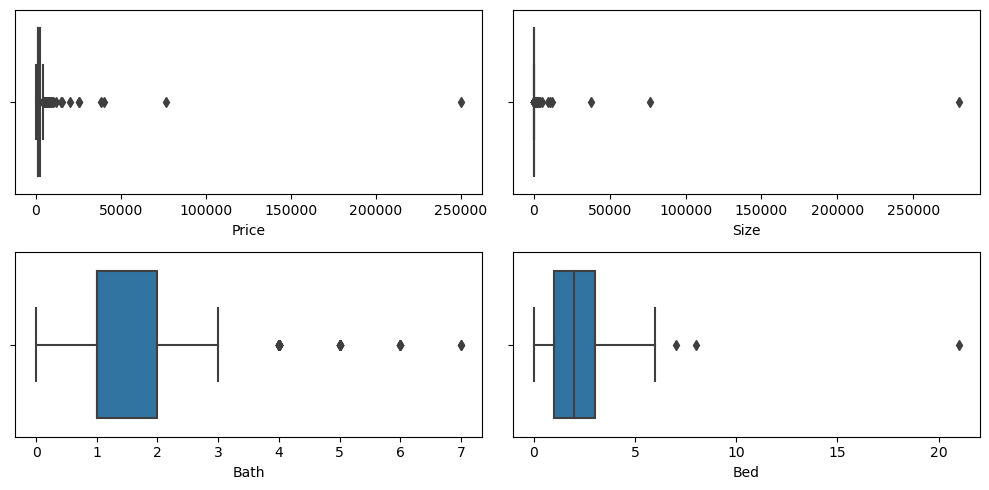

In [14]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(rent['Price'], ax = axs[0,0])
plt2 = sns.boxplot(rent['Size'], ax = axs[0,1])
plt1 = sns.boxplot(rent['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(rent['Bed'], ax = axs[1,1])

plt.tight_layout()

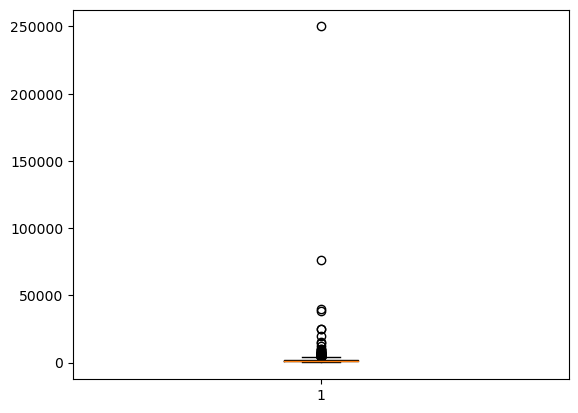

In [15]:
# outlier treatment for Price
plt.boxplot(rent.Price)
Q1 = rent.Price.quantile(0.25)
Q3 = rent.Price.quantile(0.75)
IQR = Q3 - Q1
rent = rent[(rent.Price >= Q1 - 1.5*IQR) & (rent.Price <= Q3 + 1.5*IQR)]



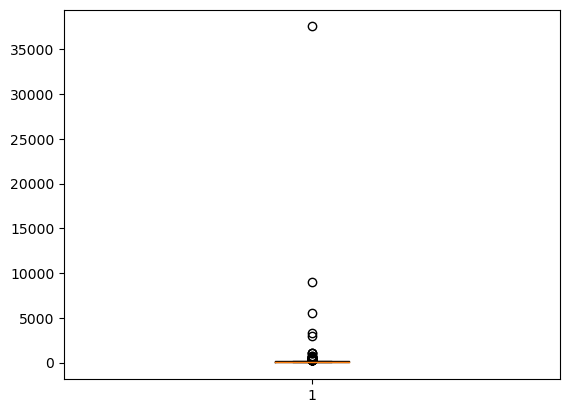

In [16]:
# outlier treatment for Size
plt.boxplot(rent.Size)
Q1 = rent.Size.quantile(0.25)
Q3 = rent.Size.quantile(0.75)
IQR = Q3 - Q1
rent = rent[(rent.Size >= Q1 - 1.5*IQR) & (rent.Size <= Q3 + 1.5*IQR)]



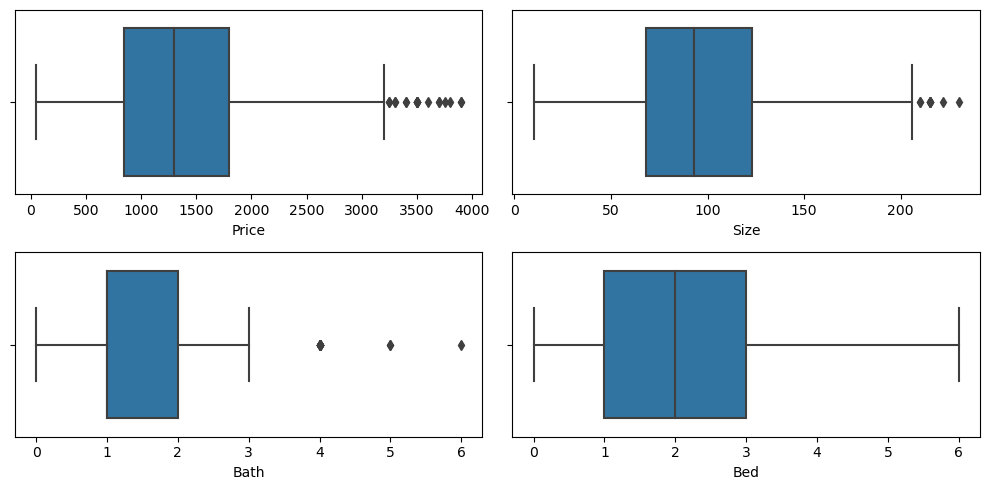

In [17]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(rent['Price'], ax = axs[0,0])
plt2 = sns.boxplot(rent['Size'], ax = axs[0,1])
plt1 = sns.boxplot(rent['Bath'], ax = axs[1,0])
plt2 = sns.boxplot(rent['Bed'], ax = axs[1,1])

plt.tight_layout()

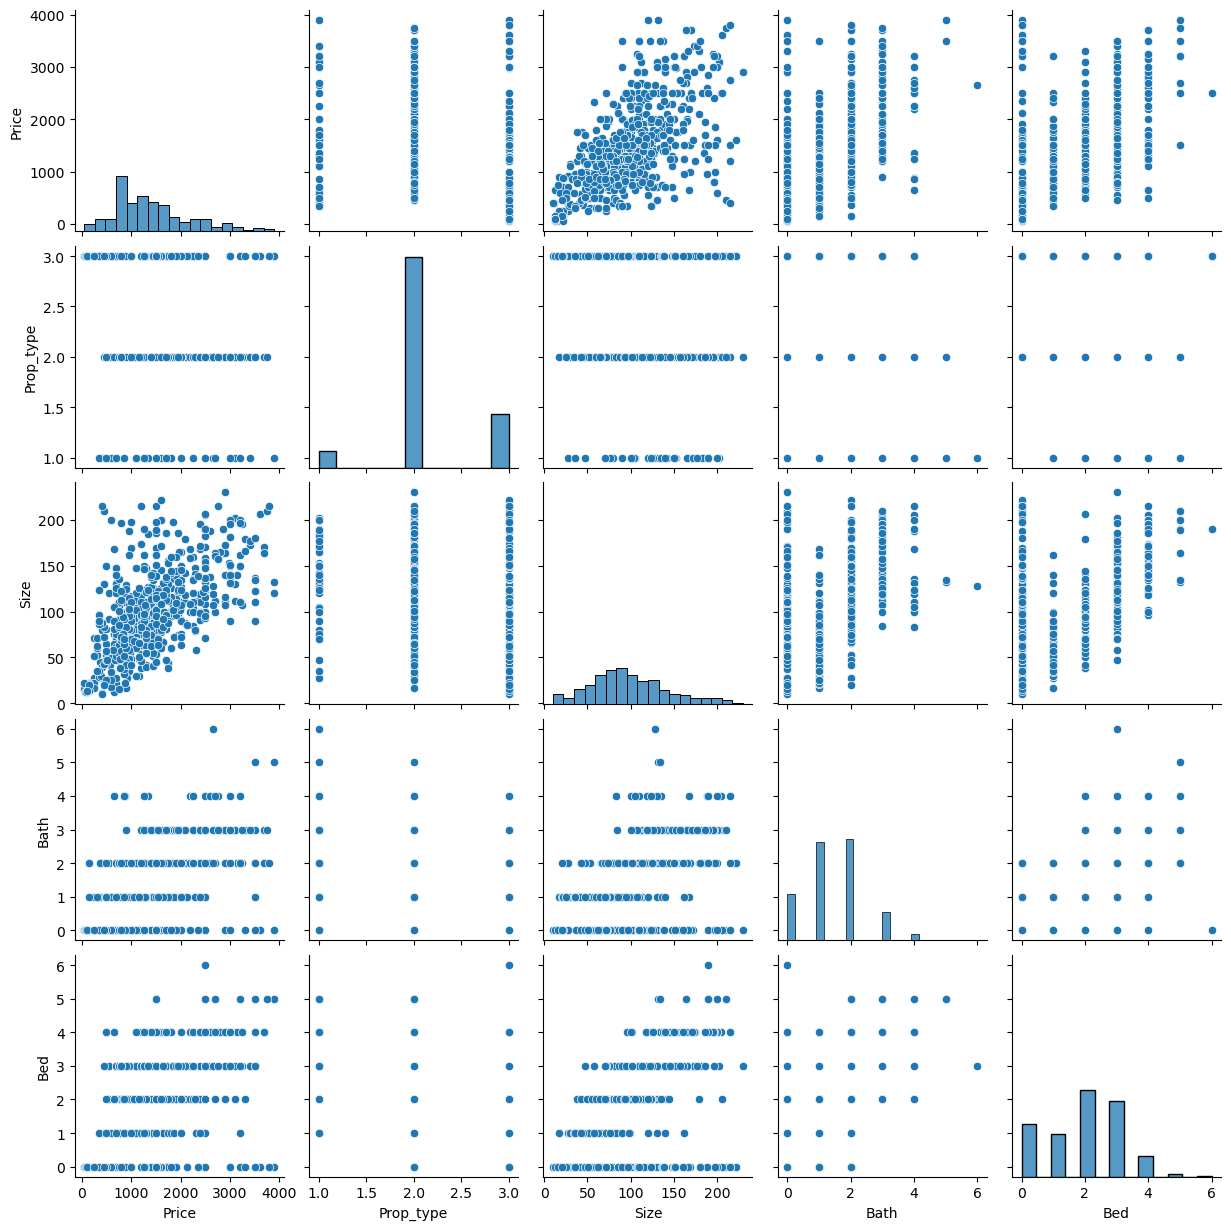

In [18]:
sns.pairplot(rent)
plt.show()

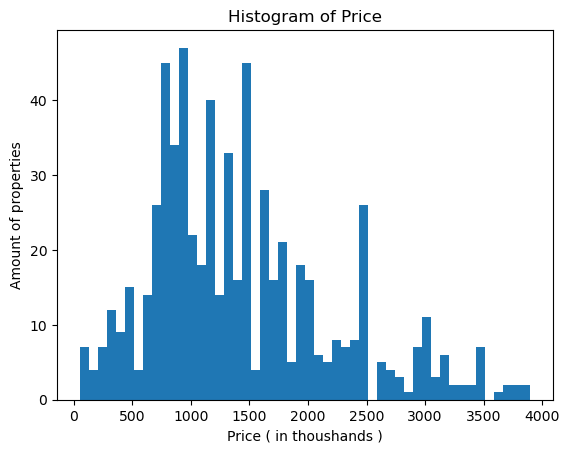

In [19]:
plt.hist(rent['Price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price ( in thoushands )')
plt.ylabel('Amount of properties')
plt.show()

<AxesSubplot:xlabel='Size', ylabel='Price'>

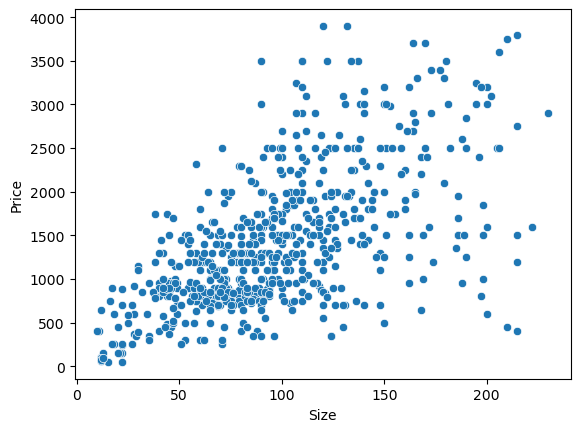

In [20]:
sns.scatterplot(x=rent['Size'], y=rent['Price'])

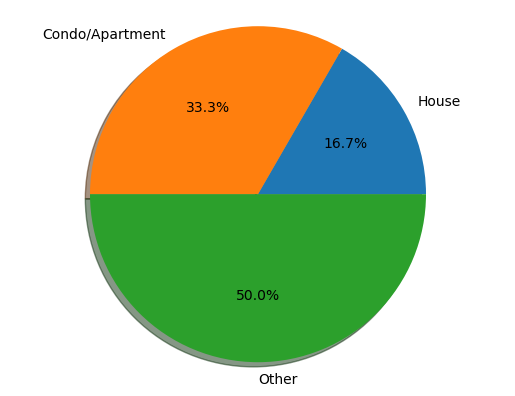

In [21]:
data = [1,2,3]
labels = ['House','Condo/Apartment','Other']
plt.pie(data,labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

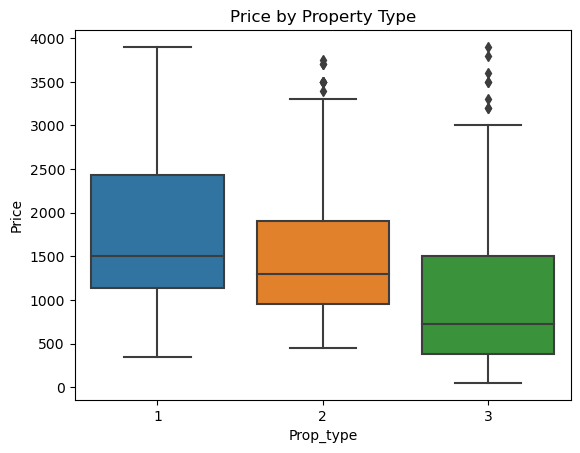

In [22]:
# Boxplot of Price by Property Type
sns.boxplot(x="Prop_type", y="Price", data=rent)
plt.title('Price by Property Type')
plt.show()

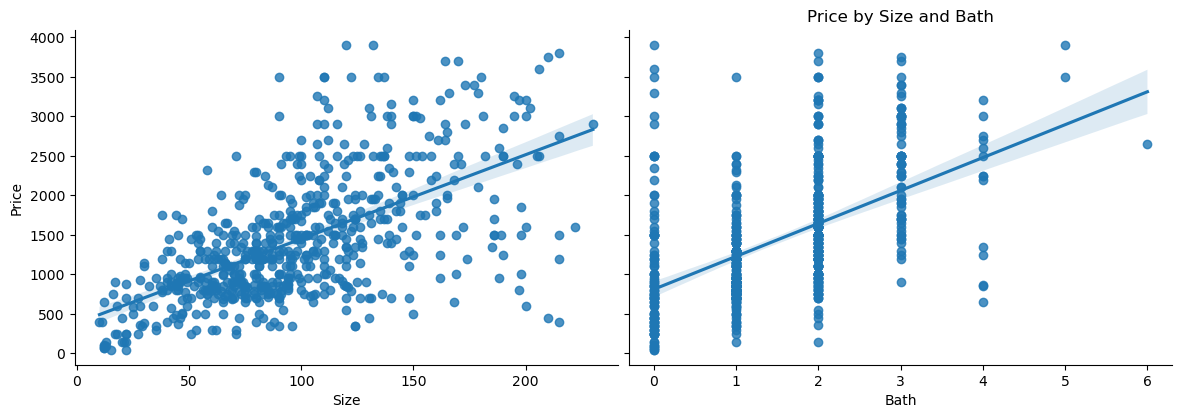

In [23]:
# Pairplot of Price by Size and Bath
sns.pairplot(data=rent, x_vars=['Size', 'Bath'], y_vars='Price', kind='reg', height=4, aspect=1.5)
plt.title('Price by Size and Bath')
plt.show()

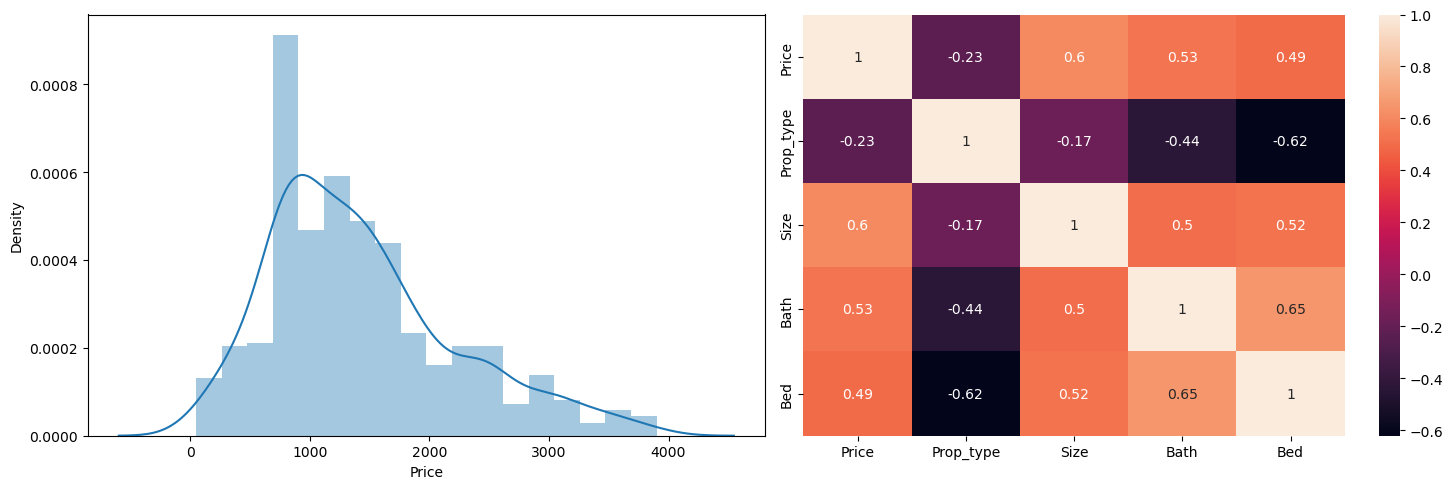

In [24]:
# histogram and heat map
corr = rent.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(rent['Price'], ax=axs[0])
sns.heatmap(corr, ax=axs[1], annot=True)
fig.tight_layout()

In [25]:
rent2=rent.copy()

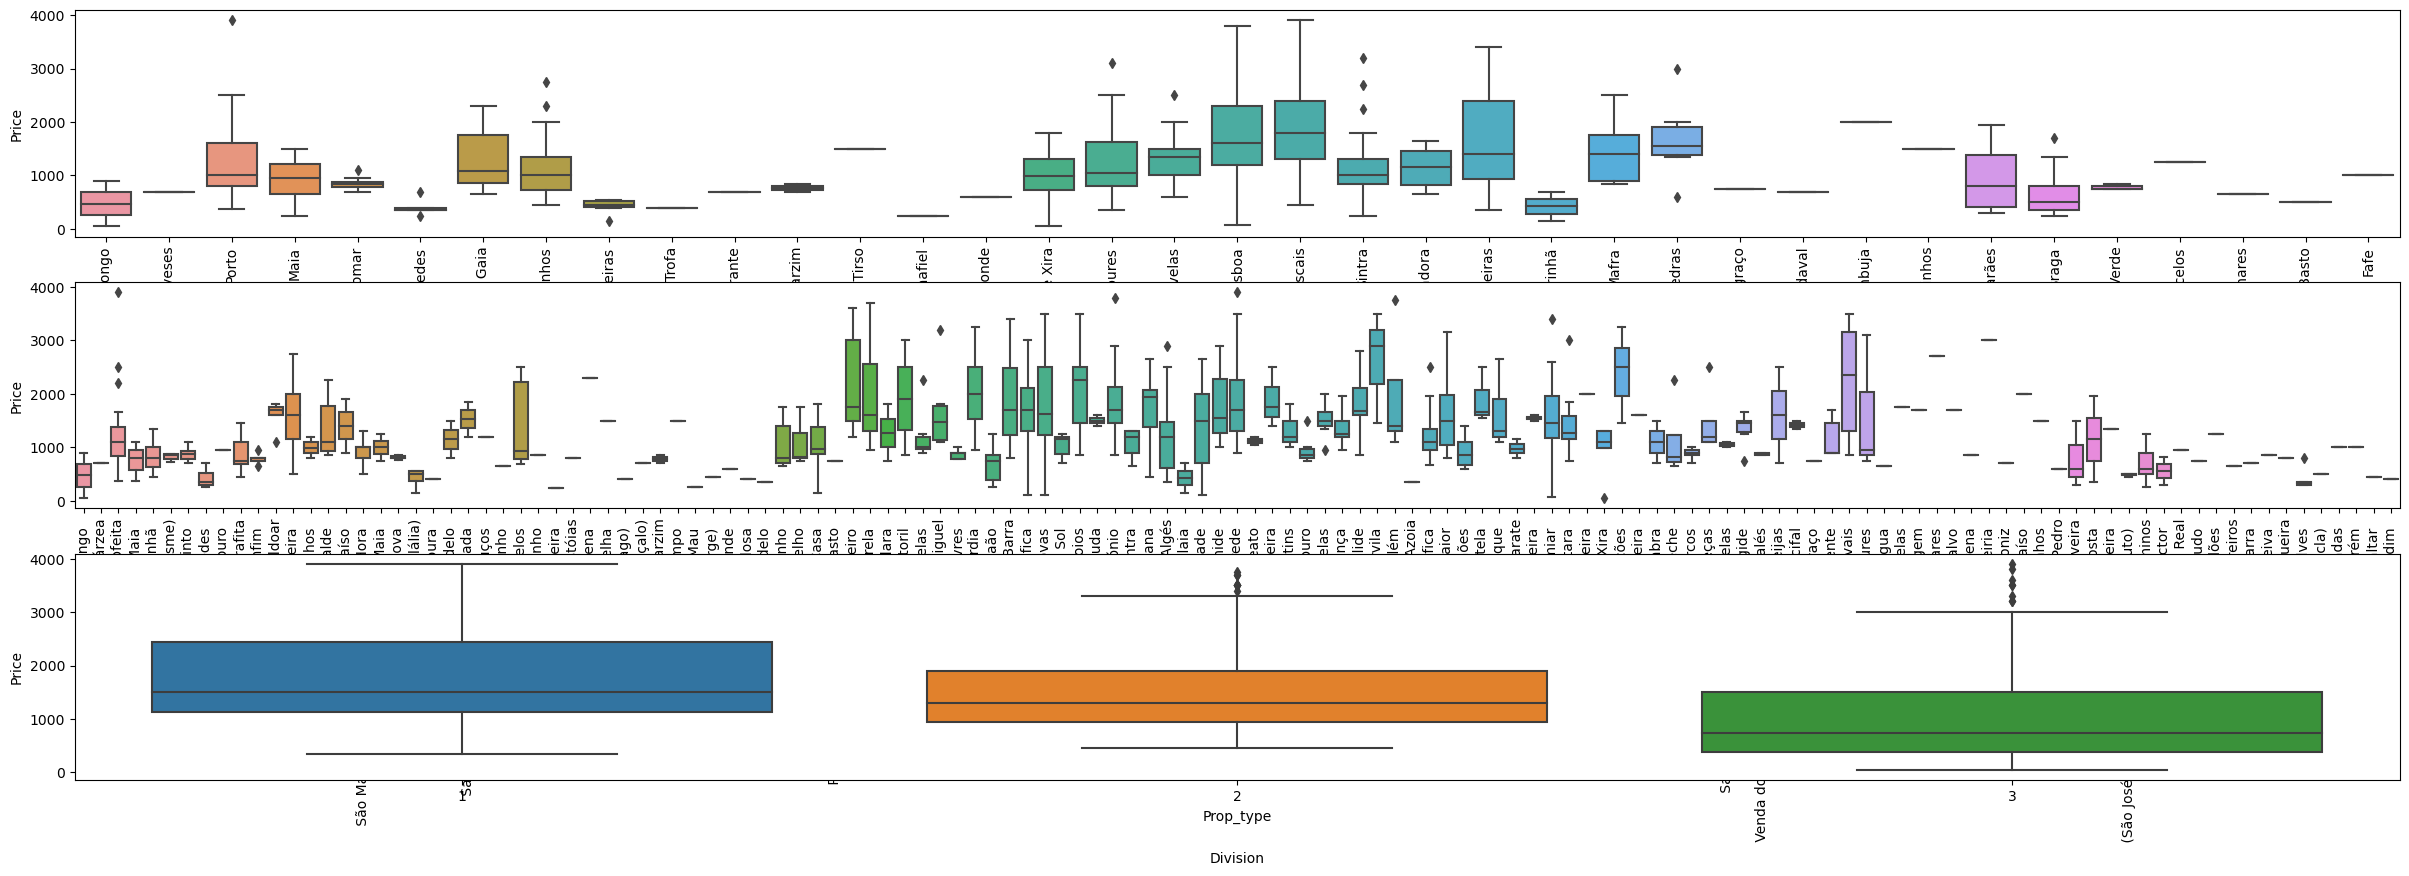

In [26]:
plt.figure(figsize=(30, 10))

plt.subplot(3,1,1)
sns.boxplot(x = 'City', y = 'Price', data = rent2)
plt.xticks(rotation='vertical')
plt.subplot(3,1,2)
sns.boxplot(x = 'Division', y = 'Price', data = rent2)
plt.xticks(rotation='vertical')
plt.subplot(3,1,3)
sns.boxplot(x = 'Prop_type', y = 'Price', data = rent2)
plt.show()

In [27]:
# dropping prop_type
rent2.drop('Prop_type',1, inplace=True) 

In [28]:
rent2.head()

,Price,Size,Bath,Bed,Term,City,Division
0,50,15,0,0,/ Monthly,Valongo,Valongo
1,700,80,0,2,/ Monthly,Marco de Canaveses,Várzea
2,1600,145,3,3,/ Monthly,Porto,Cedofeita
3,1100,110,2,2,/ Monthly,Maia,Cidade da Maia
4,900,100,2,3,/ Monthly,Porto,Campanhã


In [29]:
city_count = rent2['City'].value_counts()
city_count.head(10)

Lisboa                 247
Porto                   50
Oeiras                  48
Cascais                 45
Sintra                  41
Matosinhos              24
Braga                   23
Amadora                 19
Gondomar                19
Vila Franca de Xira     18
Name: City, dtype: int64

In [30]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 33].index)
rent2['City'] = rent2['City'].replace(minor_city, 'Other')
rent2['City'].value_counts()

Lisboa     247
Other      209
Porto       50
Oeiras      48
Cascais     45
Sintra      41
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Price'>

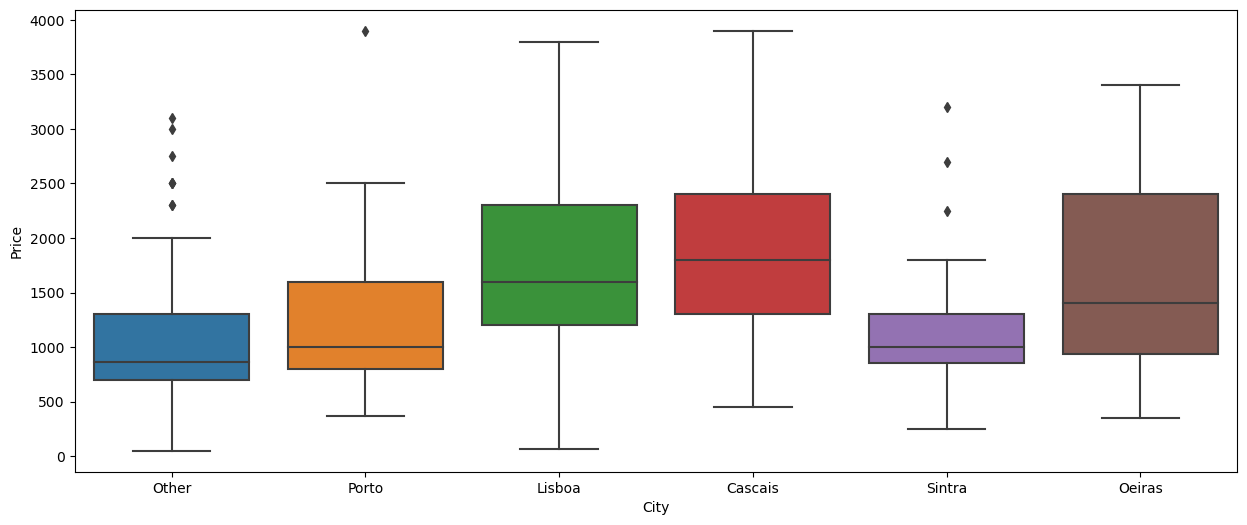

In [31]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'City', y = 'Price', data = rent2)

In [32]:
# creating dummy variables for Division
rent2.drop('Division',1, inplace=True) # dropping Division column
rent2 = pd.get_dummies(rent2, drop_first = True)



In [33]:
rent2

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Porto,City_Sintra
0,50,15,0,0,0,0,1,0,0
1,700,80,0,2,0,0,1,0,0
2,1600,145,3,3,0,0,0,1,0
3,1100,110,2,2,0,0,1,0,0
4,900,100,2,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
733,450,72,0,0,0,0,1,0,0
734,400,215,0,0,0,0,1,0,0
735,350,124,0,0,0,0,1,0,0
736,450,20,0,0,0,0,1,0,0


In [34]:
rent2.describe()

,Price,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Porto,City_Sintra
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,1429.765625,98.168750,1.482813,1.926562,0.385937,0.075000,0.326562,0.078125,0.064062
std,784.819564,44.364788,0.991206,1.254443,0.487197,0.263597,0.469322,0.268578,0.245056
min,50.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,850.000000,68.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1300.000000,93.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1800.000000,123.250000,2.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,3900.000000,230.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


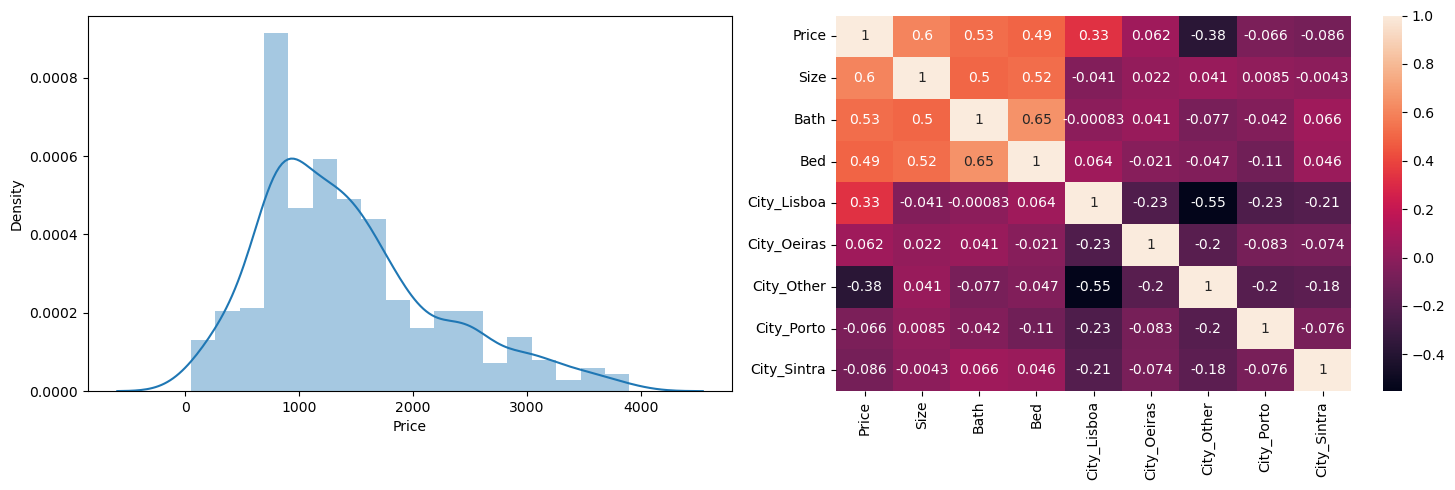

In [35]:
# histogram and heat map
rent_corr = rent2.corr()
fig, axs = plt.subplots(1,2, figsize=[15,5])
sns.distplot(rent2['Price'], ax=axs[0])
sns.heatmap(rent_corr, ax=axs[1], annot=True)
fig.tight_layout()



In [36]:
# strat train the model , splitting to 20/80 


X = rent2.drop(columns = ['Price'])
y = rent2['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

col = ['Size', 'Bath', 'Bed']
scaler = RobustScaler().fit(X_train[col])
X_train[col] = scaler.transform(X_train[col])



In [37]:
X_train.head()

,Size,Bath,Bed,City_Lisboa,City_Oeiras,City_Other,City_Porto,City_Sintra
560,0.136364,0.0,0.5,1,0,0,0,0
601,0.827273,0.0,1.0,1,0,0,0,0
320,-0.263636,-1.0,-0.5,1,0,0,0,0
374,2.027273,-2.0,-1.0,1,0,0,0,0
254,1.281818,1.0,0.5,0,0,1,0,0


In [38]:
scaler = RobustScaler().fit(X_test[col])
X_test[col] = scaler.transform(X_test[col])

In [39]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train, y_train)



LinearRegression()

In [40]:
cdf_scaled = pd.DataFrame(lm_scaled.coef_, index=X_train.columns, columns = ['coefficients'])
cdf_scaled

,coefficients
Size,488.658274
Bath,177.944244
Bed,54.404818
City_Lisboa,-17.258632
City_Oeiras,-221.661878
City_Other,-798.581239
City_Porto,-512.934645
City_Sintra,-612.063164


In [41]:
# checking R2 for train/test
print(lm_scaled.score(X_train, y_train))
print(lm_scaled.score(X_test, y_test))



0.6270767613029067
0.5546334818921739


In [42]:
y_pred = lm_scaled.predict(X_test)

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 408.8967550090955
Mean Squared Error: 250559.55480065092
Root Mean Squared Error: 500.55924204898156


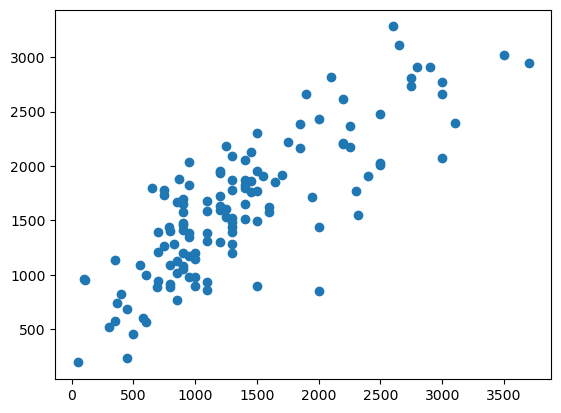

In [44]:
# actual vs predicted
plt.scatter(y_test, y_pred)  

In [45]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
scaler = RobustScaler().fit(X[col])
X[col] = scaler.transform(X[col])
y_pred_all = lm_scaled.predict(X)
residuals_all = y - y_pred_all



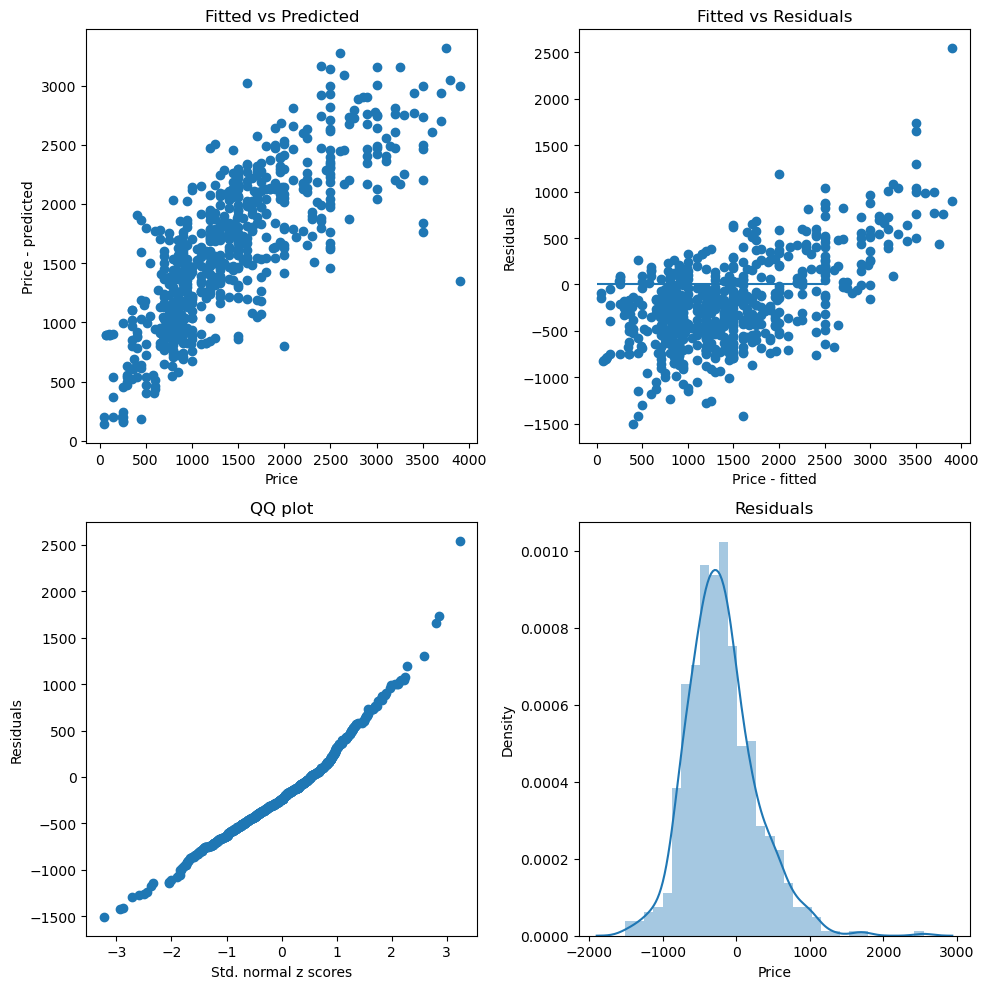

In [46]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()



In [47]:
# Using statsmodels
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
pred = model.predict(X_train)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     105.7
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          1.23e-102
Time:                        00:10:15   Log-Likelihood:                -3891.2
No. Observations:                 512   AIC:                             7800.
Df Residuals:                     503   BIC:                             7838.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1860.3734     85.614     21.730      0.000    1692.169    2028.578
Size          488.6583     33.146     14.743      0.000     423.537     553.779
Bath          177.9442     31.212      5.701      0.000     116.621     239.267
Bed            54.4048     47.548      1.144      0.253     -39.012     147.822
City_Lisboa   -17.2586     91.865     -0.188      0.851    -197.745     163.228
City_Oeiras  -221.6619    115.958     -1.912      0.056    -449.483       6.160
City_Other   -798.5812     93.843     -8.510      0.000    -982.953    -614.210
City_Porto   -512.9346    116.303     -4.410      0.000    -741.433    -284.436
City_Sintra  -612.0632    122.106     -5.013      0.000    -851.964    -372.162
==============================================================================
Omnibus:                       83.267   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.922
Skew:                           0.847   Prob(JB):                     2.86e-43
Kurtosis:                       5.512   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Regression Equation Formula
# Rent = 1860.3734 + 488.6583'size' + 177.9442'bath' + 54.4048'bed' -17.2586'if in_lisbon' -221.6619 'if in Oeiras' -798.5812'other -512.9346 'if in Porto' -612.0632 if in City Sintra 

In [51]:
# now modeling without the Z scoring
# Train/test split
X = rent2.drop(columns = ['Price'])
y = rent2['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [52]:
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [53]:
# checking R2 for train/test
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.6677219258812597
0.5206631678428746


In [54]:
y_pred = lm.predict(X_test)

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 453.2954578178126
Mean Squared Error: 354860.86853835644
Root Mean Squared Error: 595.7019964196497


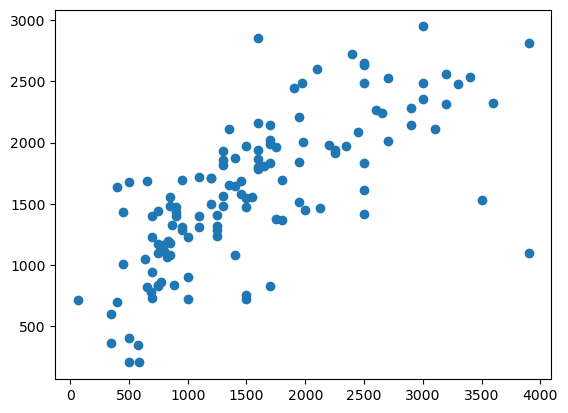

In [56]:
# actual vs predicted
plt.scatter(y_test, y_pred)  



In [57]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
y_pred_all = lm.predict(X)
residuals_all = y - y_pred_all



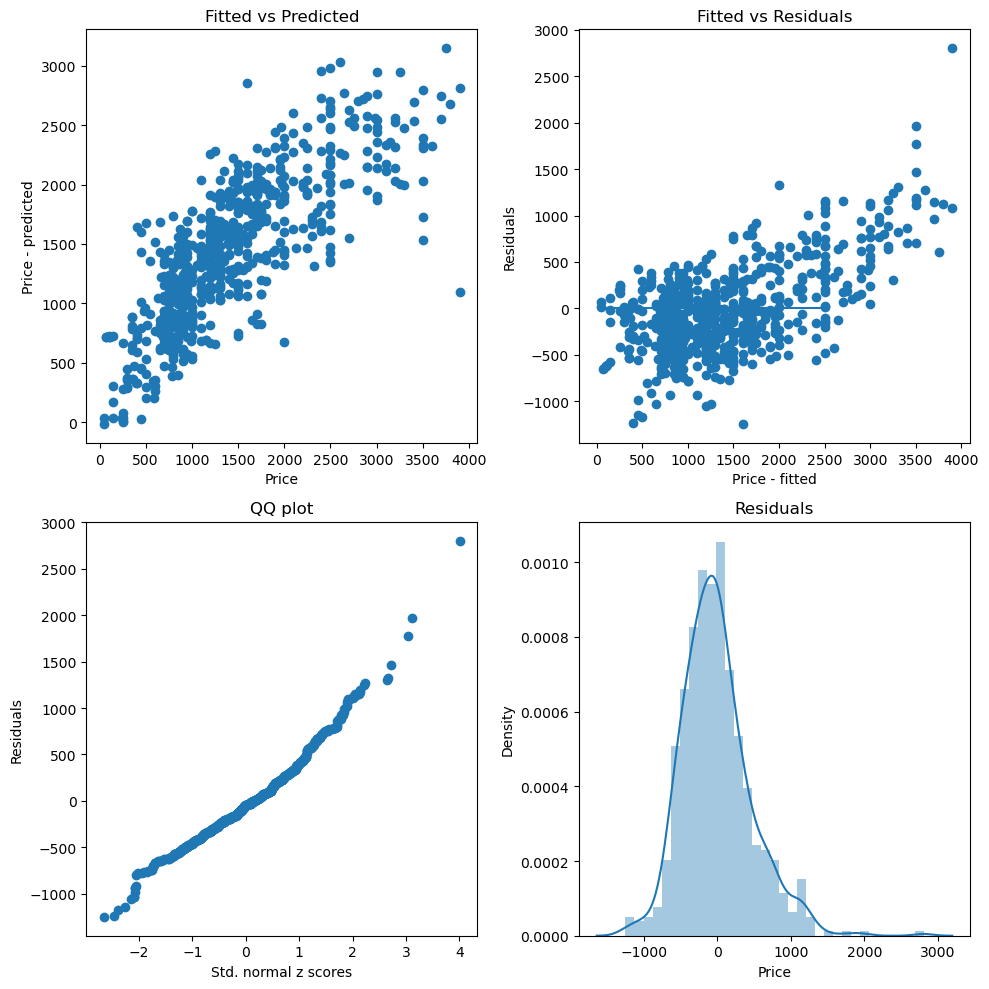

In [58]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()



In [59]:
# Using statsmodels
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
pred = model.predict(X_train)
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     126.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          3.70e-115
Time:                        00:16:00   Log-Likelihood:                -3841.1
No. Observations:                 512   AIC:                             7700.
Df Residuals:                     503   BIC:                             7738.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         654.9894     89.081      7.353      0.000     479.972     830.007
Size            8.2915      0.535     15.487      0.000       7.240       9.343
Bath          139.1590     26.846      5.184      0.000      86.414     191.904
Bed            74.0751     21.816      3.395      0.001      31.214     116.936
City_Lisboa   -37.0805     82.875     -0.447      0.655    -199.904     125.743
City_Oeiras  -226.0465    106.770     -2.117      0.035    -435.817     -16.276
City_Other   -797.3778     83.656     -9.532      0.000    -961.736    -633.020
City_Porto   -554.3479    103.592     -5.351      0.000    -757.875    -350.821
City_Sintra  -715.2435    107.443     -6.657      0.000    -926.336    -504.151
==============================================================================
Omnibus:                       45.258   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.997
Skew:                           0.692   Prob(JB):                     1.54e-13
Kurtosis:                       3.922   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
## Regression Equation Formula
# Rent = 654.9894 + 8.2915'size' +  139.1590'bath' +  74.0751'bed' -37.0805'if in_lisbon' -226.0465 'if in Oeiras' -797.3778'other -554.3479 'if in Porto' -715.2435 if in City Sintra 

In [123]:
# call to the buy file and add 'predicted rent' column 
buydf = pd.read_csv('buy_after_handling.csv')



In [124]:
buydf.head()

,Price,Prop_type,Size,Bath,Bed,City,Division
0,295000,1,140,2,3,Porto,Lordelo do Ouro e Massarelos
1,22500,1,46,0,2,Baião,Ancede e Ribadouro
2,485000,1,152,3,4,Vila do Conde,Vila Chã
3,1250000,1,527,0,10,Porto,Aldoar
4,67000,1,75,1,2,Paços de Ferreira,Carvalhosa


In [125]:
# dropping prop_type
buydf.drop(['Prop_type', 'Division'],1, inplace=True)

In [126]:
city_count = buydf['City'].value_counts()
city_count.head(10)

Lisboa               2048
Sintra                770
Porto                 686
Cascais               610
Braga                 600
Oeiras                547
Vila Nova de Gaia     481
Guimarães             323
Loures                317
Matosinhos            315
Name: City, dtype: int64

In [127]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 550].index)
buydf['City'] = buydf['City'].replace(minor_city, 'Other')
buydf['City'].value_counts()



Other      6077
Lisboa     2048
Sintra      770
Porto       686
Cascais     610
Braga       600
Name: City, dtype: int64

In [128]:
# creating dummy variables for Division
buydf = pd.get_dummies(buydf, drop_first = True)



In [129]:
buydf.head()

,Price,Size,Bath,Bed,City_Cascais,City_Lisboa,City_Other,City_Porto,City_Sintra
0,295000,140,2,3,0,0,0,1,0
1,22500,46,0,2,0,0,1,0,0
2,485000,152,3,4,0,0,1,0,0
3,1250000,527,0,10,0,0,0,1,0
4,67000,75,1,2,0,0,1,0,0


In [130]:
buydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         10791 non-null  int64
 1   Size          10791 non-null  int64
 2   Bath          10791 non-null  int64
 3   Bed           10791 non-null  int64
 4   City_Cascais  10791 non-null  uint8
 5   City_Lisboa   10791 non-null  uint8
 6   City_Other    10791 non-null  uint8
 7   City_Porto    10791 non-null  uint8
 8   City_Sintra   10791 non-null  uint8
dtypes: int64(4), uint8(5)
memory usage: 390.0 KB


In [131]:
# 1 null value in Bath column => remove
buydf = buydf.dropna(subset = ['Bath'])
buydf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10791 entries, 0 to 10790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         10791 non-null  int64
 1   Size          10791 non-null  int64
 2   Bath          10791 non-null  int64
 3   Bed           10791 non-null  int64
 4   City_Cascais  10791 non-null  uint8
 5   City_Lisboa   10791 non-null  uint8
 6   City_Other    10791 non-null  uint8
 7   City_Porto    10791 non-null  uint8
 8   City_Sintra   10791 non-null  uint8
dtypes: int64(4), uint8(5)
memory usage: 390.0 KB


In [132]:
X = buydf.drop(columns = ['Price'])
buydf['predicted_rent'] = lm.predict(X)



In [133]:
buydf.head() # rent value added



,Price,Size,Bath,Bed,City_Cascais,City_Lisboa,City_Other,City_Porto,City_Sintra,predicted_rent
0,295000,140,2,3,0,0,0,1,0,1761.992029
1,22500,46,0,2,0,0,1,0,0,387.169896
2,485000,152,3,4,0,0,1,0,0,1831.693994
3,1250000,527,0,10,0,0,0,1,0,5211.002405
4,67000,75,1,2,0,0,1,0,0,766.781801


In [134]:
buydf.to_csv(r'Buy_With_Predicted_Rent.csv', index = False, header=True)
